In [39]:
# Imported Packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score, f1_score,make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0         5         1         1         1         2         1         3   
1         5         4         4         5         7        10         3   
2         3         1         1         1         2         2         3   
3         6         8         8         1         3         4         3   
4         4         1         1         3         2         1         3   

   feature8  feature9  class  
0         1         1      0  
1         2         1      0  
2         1         1      0  
3         7         1      0  
4         1         1      0  
Number of rows: 700
Number of columns: 10
Shape of the data is: (700, 10)
Samples present in each class
 0    459
1    241
Name: class, dtype: int64


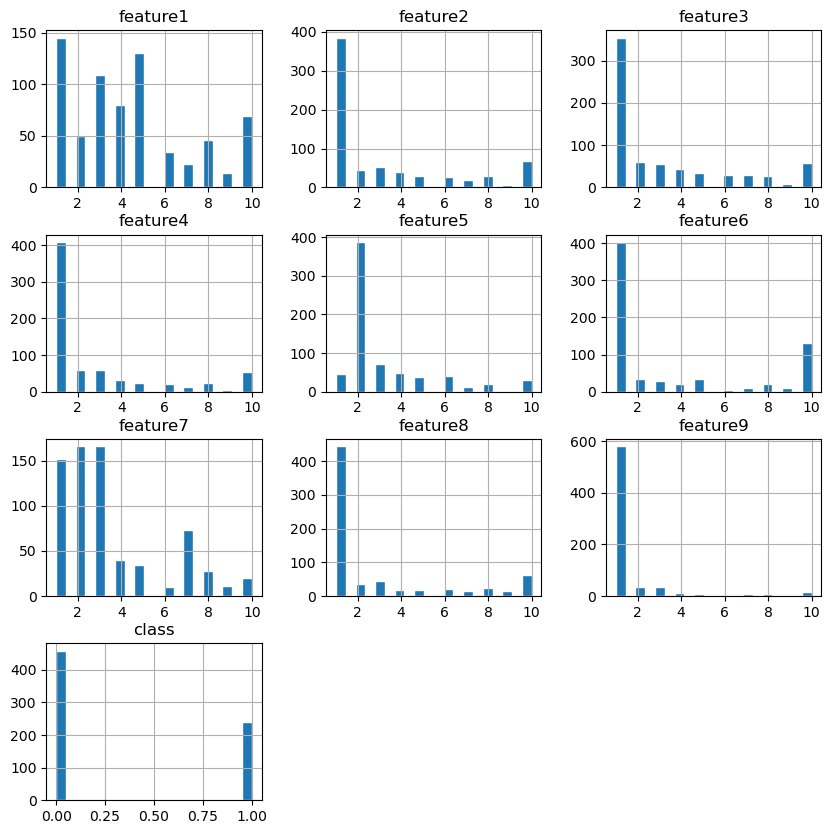

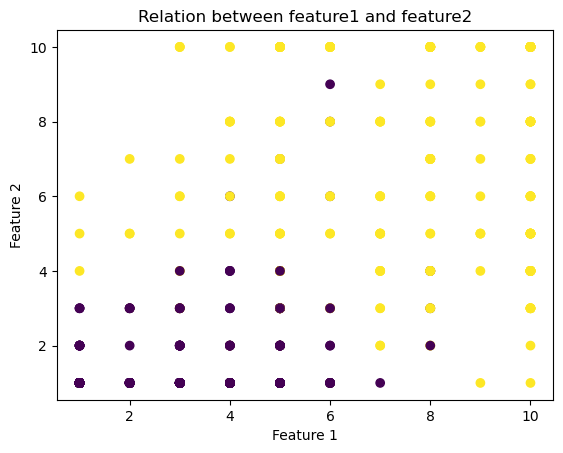

Class 0: 
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.000000    1.000000    1.000000    0.0  
25%  

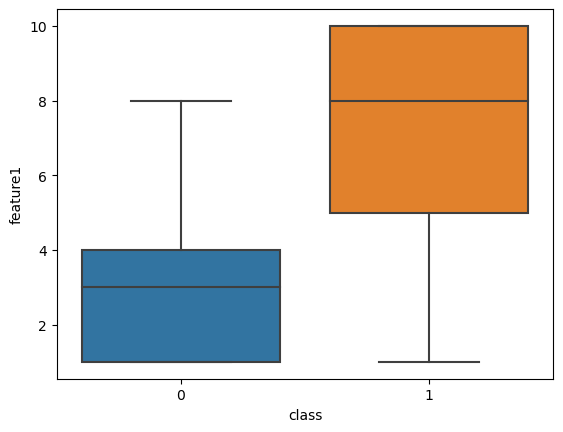

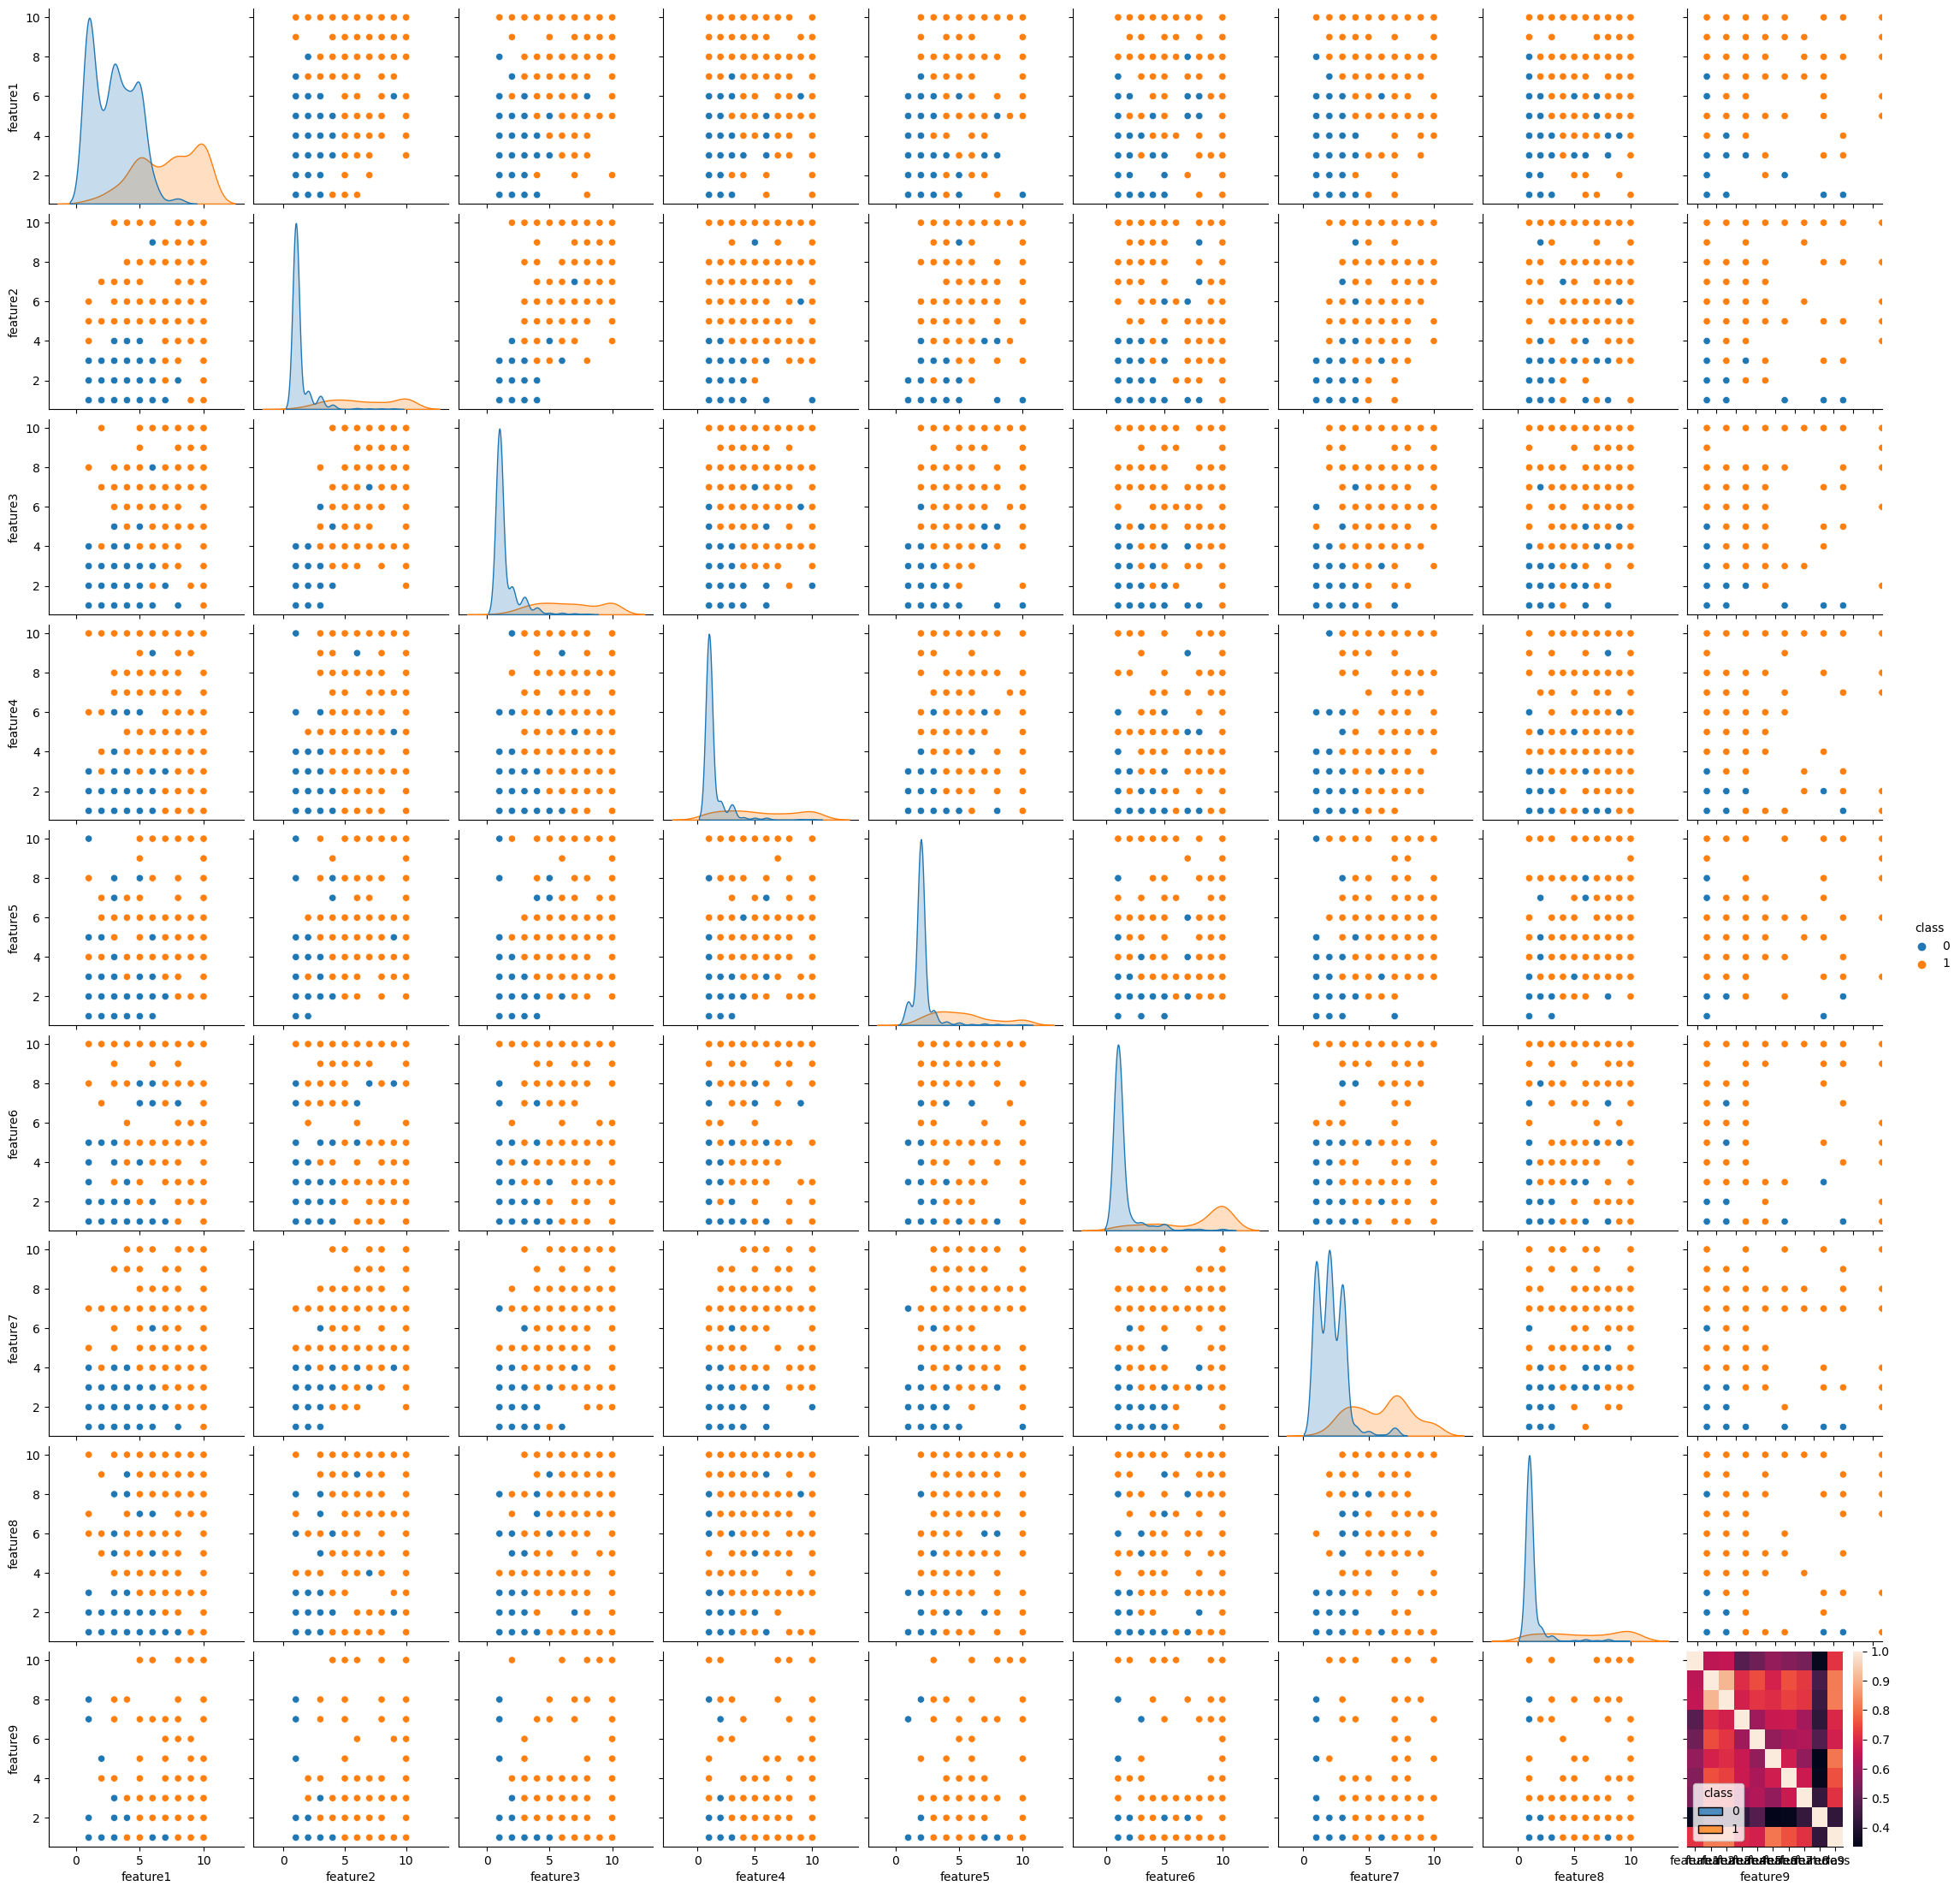

In [40]:
# Loading the dataset and printing the top 5 values in the dataset
df = pd.read_csv('dataset_assignment1.csv')
print(df.head())
# Information about the data
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))
print("Shape of the data is:",df.shape)
#  Number of samples present in each class
count = df['class'].value_counts()        
print("Samples present in each class\n",count)
# Plotting figures to visualize the dataset
df.hist(bins=20, edgecolor='white', figsize=(10, 10)) # Creating histogram for each column in the dataframe
plt.show()
# To see the relationship between two features
plt.scatter(df['feature1'], df['feature2'], c=df['class'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Relation between feature1 and feature2')
plt.show()
# Box plot to see there are any outliers
sns.boxplot(x="class", y="feature1", data=df)
# Pair plot sued to see the relationships between multiple variables in a dataset
sns.pairplot(df, hue="class")
# Histplot to compare the distribution of feature1 across different classes
sns.histplot(data=df, x='feature1', hue='class', multiple='stack')
# Heatmap to see the correlation between features
df.corr()
sns.heatmap(df.corr())
# Grouping the data based on class
grouped_data = df.groupby('class')
# Calculating the statistical description of features for each class
for classes, i in grouped_data: 
    print("Class {}: ".format(classes)) # classes represent the unique group in class
    print(i.describe()) # i reperesents the rows that belongs to the classes 
    print('\n')

In [24]:
# Splitting the data into traing and testing data
X = df.drop('class',axis = 1) # Independent features
Y = df['class'] # Dependent feature
# Train test split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,train_size = 0.8,random_state=25)

Best hyperparameters:  {'C': 0.01, 'max_iter': 75, 'penalty': 'l2'}
Best Accuracy Score is:  0.9660714285714287
Acccuracy for Logistic Regression:
 [[90  2]
 [ 3 45]]
Precision for Logistic Regression: 0.9574468085106383
Recall for Logistic Regression: 0.9375
F1_Score for Logistic Regression: 0.9473684210526315
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        92
           1       0.96      0.94      0.95        48

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



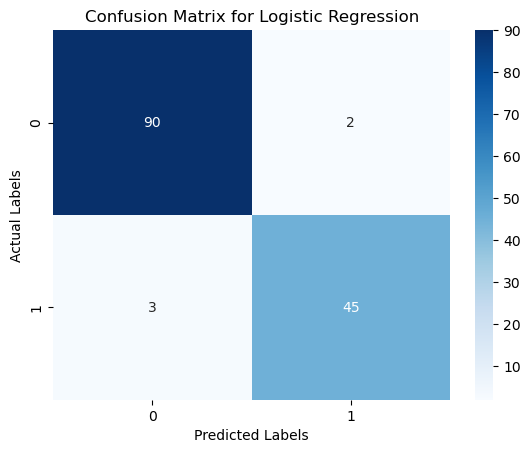

In [49]:
# Logistic Regression Model
Log_Reg = LogisticRegression()
log_grid = {'C':[0.01,0.1,1.0,10.0],'penalty':['l2'],'max_iter':[75,100,125,150]} # Defining hyperparameters to tune the data
cross_validation = KFold(n_splits=5,shuffle=True, random_state=25) # Tuning hyperparameters using 5-fold cross-validation
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
clf = GridSearchCV(Log_Reg, param_grid=log_grid, cv=cross_validation, scoring=scoring, refit='accuracy')
clf.fit(X_Train,Y_Train)
print("Best hyperparameters: ", clf.best_params_) 
print("Best Accuracy Score is: ", clf.best_score_)

# Prediction for Testing Data
Log_Reg = LogisticRegression(C=clf.best_params_['C'], penalty=clf.best_params_['penalty'])
Log_Reg.fit(X_Train, Y_Train)
Y_TestPredict = Log_Reg.predict(X_Test)
Confusion_Matrix = confusion_matrix(Y_Test,Y_TestPredict)
print("Acccuracy for Logistic Regression:\n",Confusion_Matrix)
print("Precision for Logistic Regression:",precision_score(Y_Test,Y_TestPredict))
print("Recall for Logistic Regression:",recall_score(Y_Test,Y_TestPredict))
print("F1_Score for Logistic Regression:",f1_score(Y_Test,Y_TestPredict))
print("CLASSIFICATION REPORT:\n",classification_report(Y_Test,Y_TestPredict))
sns.heatmap(Confusion_Matrix,annot=True, cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score is:  0.9513987621171438
Confusion Matrix for Random Forest is:
 [[90  2]
 [ 1 47]]
Acccuracy for Random Forest: 0.9785714285714285
Precision for Random Forest: 0.9591836734693877
Recall for Random Forest: 0.9791666666666666
F1_Score for Random Forest: 0.9690721649484536
CLASSIFICATION REPORT for Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.96      0.98      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



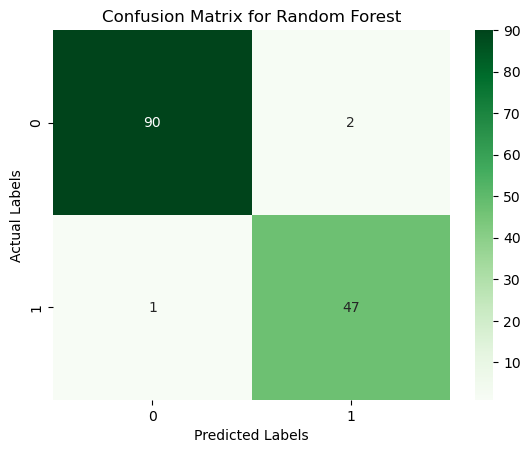

In [50]:
# Random Forest Model
Random_Forest = RandomForestClassifier()
RF_grid = {'n_estimators': [100, 200],'max_depth': [None, 5, 10],'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 2, 4]} # Defining hyperparameters to tune the data
cross_validation = KFold(n_splits=5, shuffle=True, random_state=25) # Tuning hyperparameters using 5-fold cross-validation
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
clf = GridSearchCV(Random_Forest, param_grid=RF_grid, cv=cross_validation, scoring=scoring, refit='f1')
clf.fit(X_Train, Y_Train)
print("Best hyperparameters: ", clf.best_params_)
print("Best F1 Score is: ", clf.best_score_)

Random_Forest = RandomForestClassifier(**clf.best_params_)
Random_Forest.fit(X_Train, Y_Train)
Y_TestPredict = Random_Forest.predict(X_Test)
Confusion_Matrix = confusion_matrix(Y_Test,Y_TestPredict)
print("Confusion Matrix for Random Forest is:\n",confusion_matrix(Y_Test,Y_TestPredict))
print("Acccuracy for Random Forest:",accuracy_score(Y_Test,Y_TestPredict))
print("Precision for Random Forest:",precision_score(Y_Test,Y_TestPredict))
print("Recall for Random Forest:",recall_score(Y_Test,Y_TestPredict))
print("F1_Score for Random Forest:",f1_score(Y_Test,Y_TestPredict))
print("CLASSIFICATION REPORT for Random Forest:\n",classification_report(Y_Test,Y_TestPredict))
sns.heatmap(Confusion_Matrix,annot=True, cmap="Greens")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

C:\Users\girid\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\girid\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best hyperparameters:  {'n_neighbors': 5}
Best F1 Score is:  0.9474720893141946
Confusion Matrix  fro KNN is:
 [[90  2]
 [ 2 46]]
Acccuracy for KNN: 0.9714285714285714
Precision for KNN: 0.9583333333333334
Recall for KNN: 0.9583333333333334
F1_Score for KNN: 0.9583333333333334
CLASSIFICATION REPORT FOR KNN:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        92
           1       0.96      0.96      0.96        48

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



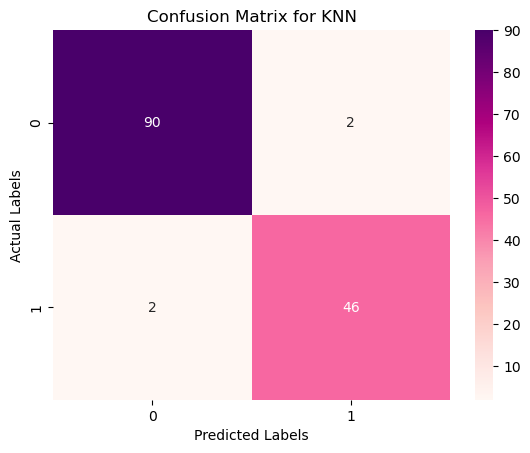

In [46]:
# KNN model
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': [3, 5, 7, 9, 11]} # Defining hyperparameters to tune the data
cross_validation = KFold(n_splits=5, shuffle=True, random_state=25)# Tuning hyperparameters using 5-fold cross-validation
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
clf = GridSearchCV(knn, param_grid=knn_grid, cv=cross_validation, scoring=scoring, refit='recall')
clf.fit(X_Train, Y_Train)
print("Best hyperparameters: ", clf.best_params_)
print("Best F1 Score is: ", clf.best_score_)
knn = KNeighborsClassifier(**clf.best_params_)
knn.fit(X_Train, Y_Train)
Y_TestPredict = knn.predict(X_Test)
Confusion_Matrix = confusion_matrix(Y_Test,Y_TestPredict)
print("Confusion Matrix  fro KNN is:\n",Confusion_Matrix)
print("Acccuracy for KNN:",accuracy_score(Y_Test,Y_TestPredict))
print("Precision for KNN:",precision_score(Y_Test,Y_TestPredict))
print("Recall for KNN:",recall_score(Y_Test,Y_TestPredict))
print("F1_Score for KNN:",f1_score(Y_Test,Y_TestPredict))
print("CLASSIFICATION REPORT FOR KNN:\n",classification_report(Y_Test,Y_TestPredict))
sns.heatmap(Confusion_Matrix,annot=True, cmap="RdPu")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for KNN")
plt.show()

<AxesSubplot:>

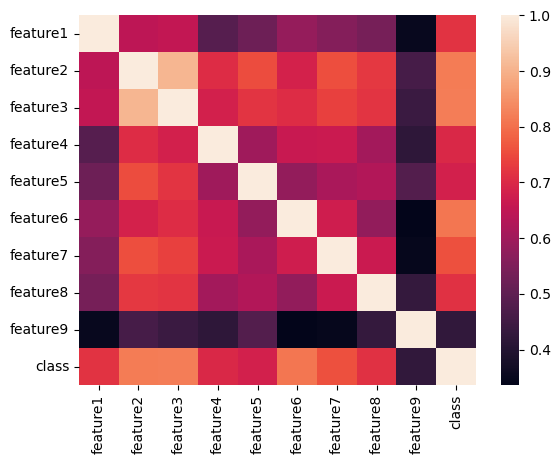

In [41]:
# df.corr()
# sns.heatmap(df.corr())

In [43]:
# sns.boxplot(x="class", y=['feature1','feature2'], data=df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().